# **Astro 160 Fall 2020 Essential Pieces of Code v.1**
## *Hunter Hall — hall@berkeley.edu — October 21, 2020*
### Edited by Ziyi Lu, Oct 2020

##### *These are simply taken from some of my lab assignments during the Fall of 2019. Feel free to make any edits you'd like to them, but when doing so, please make a new cell below the original code so that we can see why we edited the original as we did. - Hunter*

##### Formated for consistency & clarity. Added additional comments & edited some for precision.
Optimised code, esp. unnecessary append()s, where assignment should be used. They take so much more time & space. -Ziyi

In [1]:
#Import all important packages
import matplotlib.pyplot as plt
import numpy as np
# import os
import glob

# Settings below only apply for Jupyter
#This make plots inline
%matplotlib inline
#This increases image resolution
%config InlineBackend.figure_format = 'retina'

# 1.0 **Importing .txt or .csv Files**
## *Linked below are files from Hunter's 2019 datasets from Labs 1 and 2 that are used in this example — note that the glob function wasn't necessarily used in Lab 1, but that it still works for .csv and .txt files:* 
https://drive.google.com/file/d/1ZeIZHzrKRpZVqp-3zwkk0u72AKEZX2AN/view?usp=sharing

## 1.1 Importing One File

In [2]:
# Define a variable that navigates to the csv file
# Make immediately clear variable names to avoid confusion of collaborators / future u

lab1_data_path = 'example_data/lab1_pmt_data/lab1_data_10k_.8b_1r.csv'

In [3]:
# Define a variable that represents the thing we want to assign our csv data to 

lab1_data = np.loadtxt(lab1_data_path, delimiter=',', dtype='int32') 
# In the np.loadtxt function, we must set a delimiter
# It is ',' per common practice, but this may not always be the case
# We specify the data type as a 32-bit integer to avoid lowered precision

In [ ]:
# Parameters like delimiter are best declared as variables at the start of the script,
# instead of written ad hoc inline
# esp. they r repeated
# b/c DRY: Don't Repeat Yrslf

# That make typos less likely & changes easier
# Constants not subject to change r usu. CAPITALISED
DELIMITER = ','
DTYPE = 'int32'

lab1_data = np.loadtxt(lab1_data_path, delimiter=DELIMITER, dtype=DTYPE)

In [4]:
# Check to see if the data from csv file you've imported makes sense 
# — for Lab 1, we should get an array with two columns 
# in which the first represents the Channel Number of the Photomultiplier Tubes (PMTs)
# and the second represents the time-stamps

# Let's print out indicators about our data
#--------------------------------------#
print(type(lab1_data)) # Check to make sure that the class is an array
print(np.shape(lab1_data)) # Check to make sure that the dimensions of the data makes sense
# (9892, 2) means the array has 2 axes, the 0th having 9892 elements & the 1st having 2
# NumPy counts from 0 like most other computer programmes
print(lab1_data) # Check to make sure that the values of the data make sense
#--------------------------------------#

<class 'numpy.ndarray'>
(9892, 2)
[[        2 907536784]
 [        2 922749663]
 [        2 922750970]
 ...
 [        2 753463664]
 [        2 766107459]
 [        2 770382781]]


In [5]:
# Now, let's go from the imported array to useful data


# Obtains an array of useful data
#--------------------------------------#
time_step = lab1_data[:,1] 
# This step gets rid of the 0th (first) column since we don't care about the Channel Number
# The ':' copies all 9892 elements along the 0th axis
# The 1 selects the 1st element out of the 2 along the 1st axis
# The 0th element is the Channel Numbers & the 1st is the time-stamps
#--------------------------------------#


# Let's print out indicators about our data again
# In practice, u may define this process as a function() to avoid repetition
# Instructions for function definition in 1.2
#--------------------------------------#
print(type(time_step)) # Check to make sure that the class is an array
print(np.shape(time_step)) # Check to make sure that the dimensions of the data makes sense
print(time_step) # Check to make sure these time-step values make sense from our data
#--------------------------------------#

<class 'numpy.ndarray'>
(9892,)
[907536784 922749663 922750970 ... 753463664 766107459 770382781]


In [6]:
# Merging all steps above into one cell


# Navigate to raw data
#--------------------------------------#
lab1_data_path = 'example_data/lab1_pmt_data/lab1_data_10k_.8b_1r.csv'
#--------------------------------------#


# Import data
#--------------------------------------#
lab1_data = np.loadtxt(lab1_data_path, delimiter=',', dtype='int32')
#--------------------------------------#


# Obtains an array of useful data (time-stamps)
#--------------------------------------#
time_step = lab1_data[:,1]
#--------------------------------------#


# Displays the final output we've made
#--------------------------------------#
print(time_step)
#--------------------------------------#

array([907536784, 922749663, 922750970, ..., 753463664, 766107459,
       770382781], dtype=int32)

## 1.2 Importing Multiple Files with *glob*

In [7]:
# Instead of importing and manipulating data step-by-step like in 1.1, 
# we will define a reusable function to do multiple steps
# This is a naive version with append()s that is slow & space-consuming

def get_signal(file_path):
    '''
    Reads signals from a file at FILE_PATH generated by a 1D CCD.
    '''
    # Note format of 'docstring'
    # Write one for every function in case anyone forgets
    # CAPITALISE input parameters
    
    # This represents the pixels of the 1D CCD used in Lab 2
    # This range is set as there are 2048 pixels in the CCD
    # The result is from 0 to 2047
    pixel = np.arange(0, 2048)
    signal = [] # This represents the signal/intensities of each pixel in the 1D CCD used in Lab 2
    
    # Here, we implement the glob.glob feature to unpack all .txt files in the lab2_neon_data folder
    for file in glob.glob(file_path):
        pixNum, s = np.genfromtxt(file, dtype=(float), skip_header=17, skip_footer=1, unpack=True)
        # If we open one of the neon.txt files in a text editor, 
        # we can see it has a header that is 17 lines long, and a footer that is one line long, 
        # so we exclude those with the np.genfromtxt function

        signal.append(s)
    return(pixel, signal) # This will make the function output an array of pixels and an array of corresponding signals

In [ ]:
# Appending is usu. a bad idea, esp. if u know the length of the output array already
# It takes much time & space unnecessarily
# Define a null array w known shape & assign values to it instead

def get_signal_optimal(file_path):
    '''
    Reads signals from a file at FILE_PATH generated by a 1D CCD.
    This one replaces append()s w/ assignments to save time & space.
    '''
    # These constants better b defined at start of the whole code
    CCD_PIXELS = 2048
    LENGTH_HEADER = 17
    LENGTH_FOOTER = 1
    
    pixel = np.arange(0, CCD_PIXELS)
    
    files = glob.glob(file_path)
    n_files = len(files)
    signal = np.zeros((n_files, CCD_PIXELS)) # An empty 2D array of zeros
    
    for i in range(n_files):
        pixNum, s = np.genfromtxt(file, dtype=(float), skip_header=LENGTH_HEADER, skip_footer=LENGTH_FOOTER, unpack=True)
        signal[i] = s
    return(pixel, signal)

In [8]:
# Now we will run the function from the previous cell using neon data from Lab 2 
# which was provided in the dataset download link at the start of this notebook

lab2_file_path = 'example_data/lab2_neon_data/*.txt' 
# Define a variable that navigates to the folder where all of the neon.txt files are located
# * is a wildcard representing a string of characters of any length, including 0

# This will output an array of pixels and an array of corresponding signals for each file in the neon dataset
pixel, signal = get_signal(lab2_file_path)

In [9]:
# What we really want though is an averaged signal for each pixel across the entire neon dataset, 
# so in order to do this we will take the mean of the pixel-by-pixel signals across each file in the dataset

signal_avg_neon = np.mean(signal, axis=0) #axis=0 makes the mean move through each file in the dataset
# Without setting the axis, the mean will be of a flattened 1D array containing every number in it

<class 'numpy.ndarray'>
(2048,)
[  0.   125.63 127.1  ... 139.78 140.17 140.1 ]


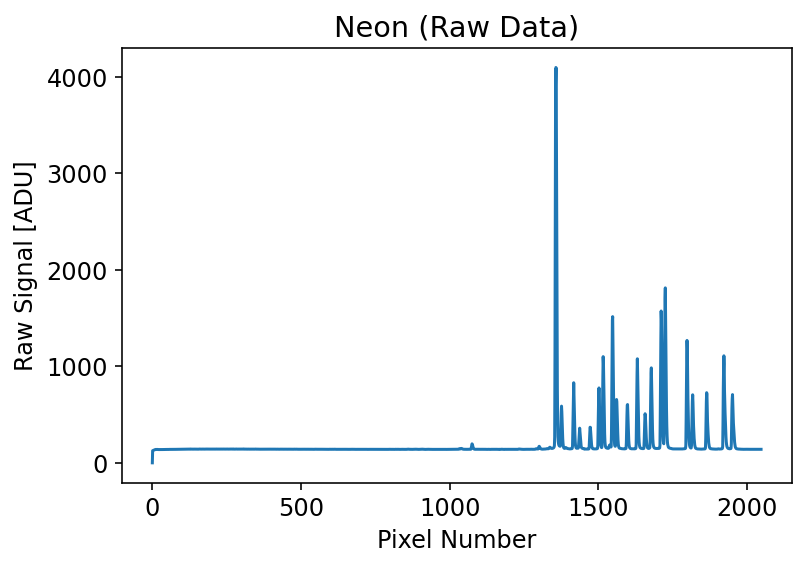

In [10]:
# Now, let's check to make sure our results make sense

#Let's print out indicators about our data
#--------------------------------------#
print(type(signal_avg_neon)) # Check to make sure that the class is an array
print(np.shape(signal_avg_neon)) # Check to make sure that the dimensions of your data makes sense — in this case we should 2048 values as there should be a value for each of the 2048 pixels in the CCD
print(signal_avg_neon) # Check to make sure that the values of the data make sense
#--------------------------------------#


# Let's plot it to make sure it looks like the correct spectrum too
#--------------------------------------#
plt.figure()
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 12})
plt.plot(pixel,signal_avg_neon)
plt.title('Neon (Raw Data)')
plt.xlabel('Pixel Number')
plt.ylabel('Raw Signal [ADU]')
plt.show()
#--------------------------------------#

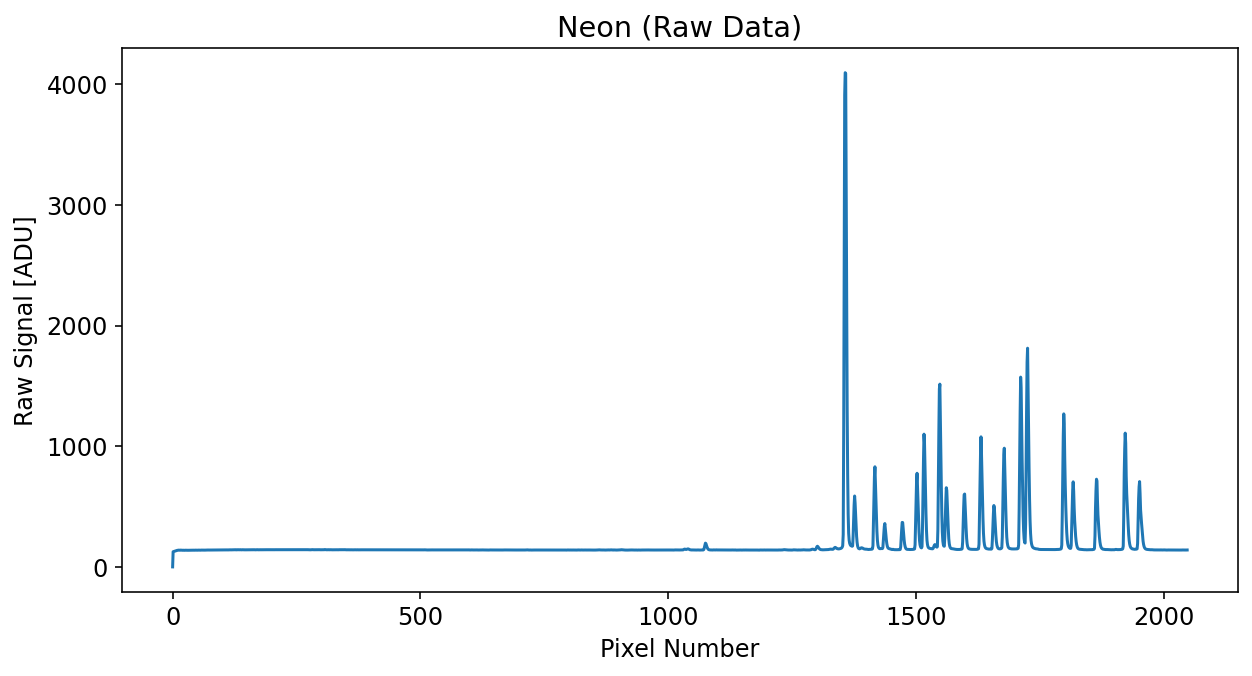

In [11]:
# Merging all steps above into one cell


# Function
#--------------------------------------#
def get_signal(file_path):
    '''
    Reads signals from a file at FILE_PATH generated by a 1D CCD.
    '''
    # This represents the pixels of the 1D CCD used in Lab 2
    # This range is set as there are 2048 pixels in the CCD
    # The result is from 0 to 2047
    pixel = np.arange(0, 2048)
    signal = [] # This represents the signal/intensities of each pixel in the 1D CCD used in Lab 2
    
    def get_signal_optimal(file_path):
    '''
    Reads signals from a file at FILE_PATH generated by a 1D CCD.
    This one replaces append()s w/ assignments to save time & space.
    '''
    CCD_PIXELS = 2048
    LENGTH_HEADER = 17
    LENGTH_FOOTER = 1
    
    pixel = np.arange(0, CCD_PIXELS)
    
    files = glob.glob(file_path)
    n_files = len(files)
    signal = np.zeros((n_files, CCD_PIXELS)) # An empty 2D array of zeros
    
    for i in range(n_files):
        pixNum, s = np.genfromtxt(file, dtype=(float), skip_header=LENGTH_HEADER, skip_footer=LENGTH_FOOTER, unpack=True)
        signal[i] = s
    return(pixel, signal)
#--------------------------------------#


# Navigate to raw data
#--------------------------------------#
lab2_file_path = 'example_data/lab2_neon_data/*.txt'
#--------------------------------------#


# Import data by executing function
#--------------------------------------#
pixel, signal = get_signal(lab2_file_path)
#--------------------------------------#


# Average files in the dataset
#--------------------------------------#
signal_avg_neon = np.mean(signal, axis=0)
#--------------------------------------#

# Plotting
#--------------------------------------#
plt.figure()
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 12})
plt.plot(pixel,signal_avg_neon)
plt.title('Neon (Raw Data)')
plt.xlabel('Pixel Number')
plt.ylabel('Raw Signal [ADU]')
plt.show()
#--------------------------------------#

# 2.0 **Peak Finding and Centroiding**
## *The data used in this section is the same data from section 1.0* 

## 2.1 1D Peak Finding Algorithm

In [7]:
# We are going to use the same neon spectrum from the previous section, 
# so let's re-run the final cell from the previous section to make sure we are starting with the fresh, unchanged raw data


# Everything below is identical to the final cell from the previous section
#-------------------------------------------------------------------------#


# Function
#--------------------------------------#
def get_signal(file_path):
    '''
    Reads signals from a file at FILE_PATH generated by a 1D CCD.
    '''
    # This represents the pixels of the 1D CCD used in Lab 2
    # This range is set as there are 2048 pixels in the CCD
    # The result is from 0 to 2047
    pixel = np.arange(0, 2048)
    signal = [] # This represents the signal/intensities of each pixel in the 1D CCD used in Lab 2
    
    def get_signal_optimal(file_path):
    '''
    Reads signals from a file at FILE_PATH generated by a 1D CCD.
    This one replaces append()s w/ assignments to save time & space.
    '''
    CCD_PIXELS = 2048
    LENGTH_HEADER = 17
    LENGTH_FOOTER = 1
    
    pixel = np.arange(0, CCD_PIXELS)
    
    files = glob.glob(file_path)
    n_files = len(files)
    signal = np.zeros((n_files, CCD_PIXELS)) # An empty 2D array of zeros
    
    for i in range(n_files):
        pixNum, s = np.genfromtxt(file, dtype=(float), skip_header=LENGTH_HEADER, skip_footer=LENGTH_FOOTER, unpack=True)
        signal[i] = s
    return(pixel, signal)
#--------------------------------------#


# Navigate to raw data
#--------------------------------------#
lab2_file_path = 'example_data/lab2_neon_data/*.txt'
#--------------------------------------#


# Import data by executing function
#--------------------------------------#
pixel, signal = get_signal(lab2_file_path)
#--------------------------------------#


# Average files in the dataset
#--------------------------------------#
signal_avg_neon = np.mean(signal, axis=0)
#--------------------------------------#

# Plotting
#--------------------------------------#
plt.figure()
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 12})
plt.plot(pixel,signal_avg_neon)
plt.title('Neon (Raw Data)')
plt.xlabel('Pixel Number')
plt.ylabel('Raw Signal [ADU]')
plt.show()
#--------------------------------------#

NameError: name 'glob' is not defined

In [6]:
# Now, we want to write some code that will give us the signal values of the peaks in the neon raw spectrum

# We don't want ALL of the peaks in the spectrum, 
# because there are many small peaks that we don't necessarily need to use for the wavelength solution or spectroscopy later. 
# So we set a minimum signal threshold, in this case 200 ADU, 
# to only return the peaks that are above this threshold instead of all peaks in the spectrum.
threshold_neon =  200
peaks_neon = []
peaks_index_neon = [] # x positions of the peaks, or rather, their index
for i in range(len(signal_avg_neon)-1): #len(signal)-1 because you will be checking the value after than your last i 
    if (threshold_neon <= signal_avg_neon[i]) \
        and (signal_avg_neon[i - 1] <= signal_avg_neon[i]) \
        and (signal_avg_neon[i] >= signal_avg_neon[i + 1]):  #three conditions to be a peak 
        peaks_neon.append(signal_avg_neon[i])
        peaks_index_neon.append(i)

NameError: name 'signal_avg_neon' is not defined

[[1357.   4095.  ]
 [1376.    587.45]
 [1417.    829.56]
 [1437.    359.11]
 [1472.    368.4 ]
 [1502.    775.88]
 [1516.   1100.02]
 [1548.   1514.42]
 [1561.    656.04]
 [1598.    603.69]
 [1631.   1077.69]
 [1657.    508.57]
 [1678.    983.65]
 [1711.   1572.63]
 [1725.   1812.26]
 [1798.   1267.97]
 [1817.    704.76]
 [1864.    726.63]
 [1922.   1108.59]
 [1951.    706.82]]


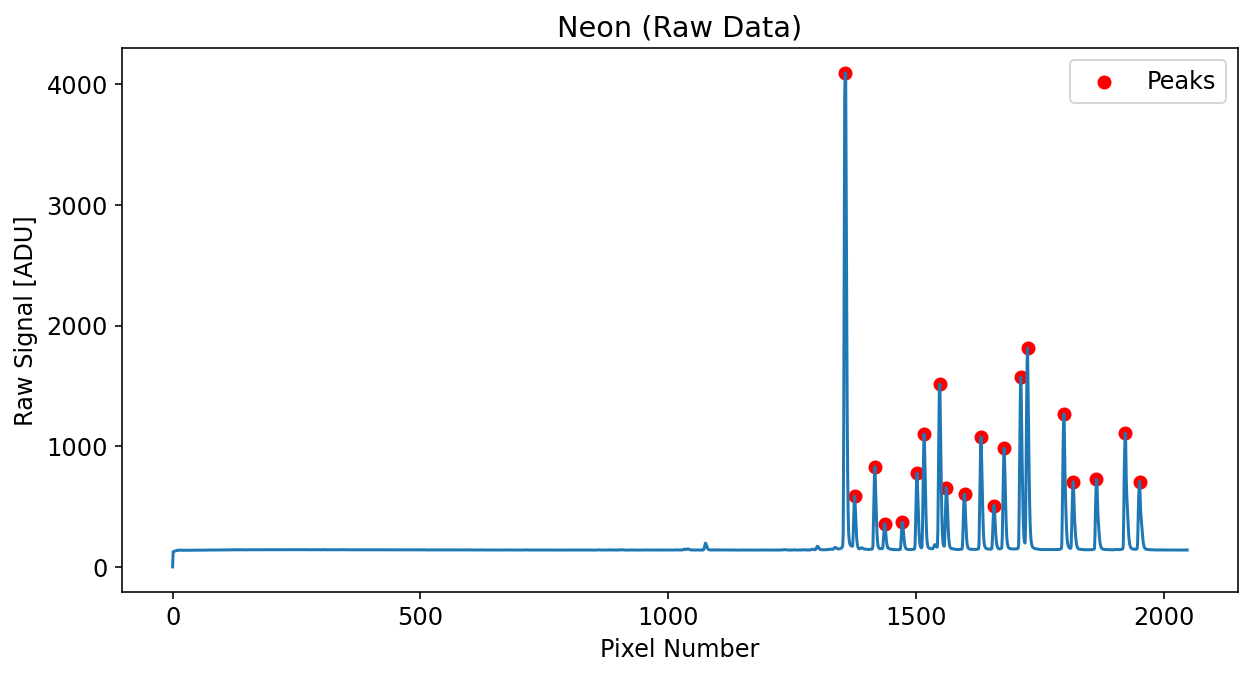

In [14]:
# Next, we want to confirm that the peak finding function worked, 
# so we will print out the peak signal values, their pixel locations, and then plot them over the original spectrum 
# to see if everything lines up

# Let's print out indicators about our data
#--------------------------------------#
# This prints out two columns with the first representing the pixel location of the peak 
# and the second representing the signal value at that peak
print(np.hstack((np.vstack(peaks_index_neon),np.vstack(peaks_neon))))
# Output will be in the format below:
# Pixel number, signal 
#--------------------------------------#


# Let's plot the spectrum as well as a scatter plot of our peaks to make sure it looks correct
#--------------------------------------#
plt.figure()
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 12})
plt.plot(pixel, signal_avg_neon)
plt.scatter(peaks_index_neon, peaks_neon, color='red', marker='o', label='Peaks')
plt.title('Neon (Raw Data)')
plt.xlabel('Pixel Number')
plt.ylabel('Raw Signal [ADU]')
plt.legend()
plt.show()
#--------------------------------------#

## 2.2 1D Centroiding
### *Tutorial I followed during 2019 to help make my Lab 2 centroiding function:* 
https://prappleizer.github.io/Tutorials/Centroiding/centroiding_tutorial.html

In [15]:
#We want to write some code for the neon data 
# that will give us the x-coordinate/pixel position of the centroids of our primary peaks. 
# We will be using the peak finding code from section 2.1 for the initial pixel position guesses, 
# so make sure that has been run before this cell.

centroids_neon = [] # Pixel coordinates for all the centroids
FWHM = [] # Full-width-half-max signal values for each centroid
for i in peaks_index_neon: # We are using the pixel indeces from our original peak finding function
    half_max = signal_avg_neon[i]/2.
    xmin = np.where(signal_avg_neon[i:0:-1] <= half_max)[0][0]
    xmax = np.where(signal_avg_neon[i:-1] <= half_max)[0][0]
    x_range = pixel[i - xmin:i + xmax]
    I_range = signal_avg_neon[i - xmin:i + xmax]
    x_range = np.array(x_range)
    I_range = np.array(I_range)
    x_com = np.sum(x_range * I_range / np.sum(I_range)) # x_com stands for X Center of Mass, 
    # which is the x-coordinate of our centroid, since a centroid is a center of mass
    centroids_neon.append(x_com)
    FWHM.append(half_max)

[[1357.20870715 2047.5       ]
 [1376.11862528  293.725     ]
 [1416.70347477  414.78      ]
 [1437.05543205  179.555     ]
 [1472.95107631  184.2       ]
 [1502.00952873  387.94      ]
 [1516.270136    550.01      ]
 [1547.59529781  757.21      ]
 [1561.23322028  328.02      ]
 [1597.65339269  301.845     ]
 [1631.10008168  538.845     ]
 [1657.51673145  254.285     ]
 [1677.42031782  491.825     ]
 [1711.24469696  786.315     ]
 [1724.61853478  906.13      ]
 [1798.16145402  633.985     ]
 [1817.02956637  352.38      ]
 [1864.19323337  363.315     ]
 [1922.10202521  554.295     ]
 [1951.10409527  353.41      ]]


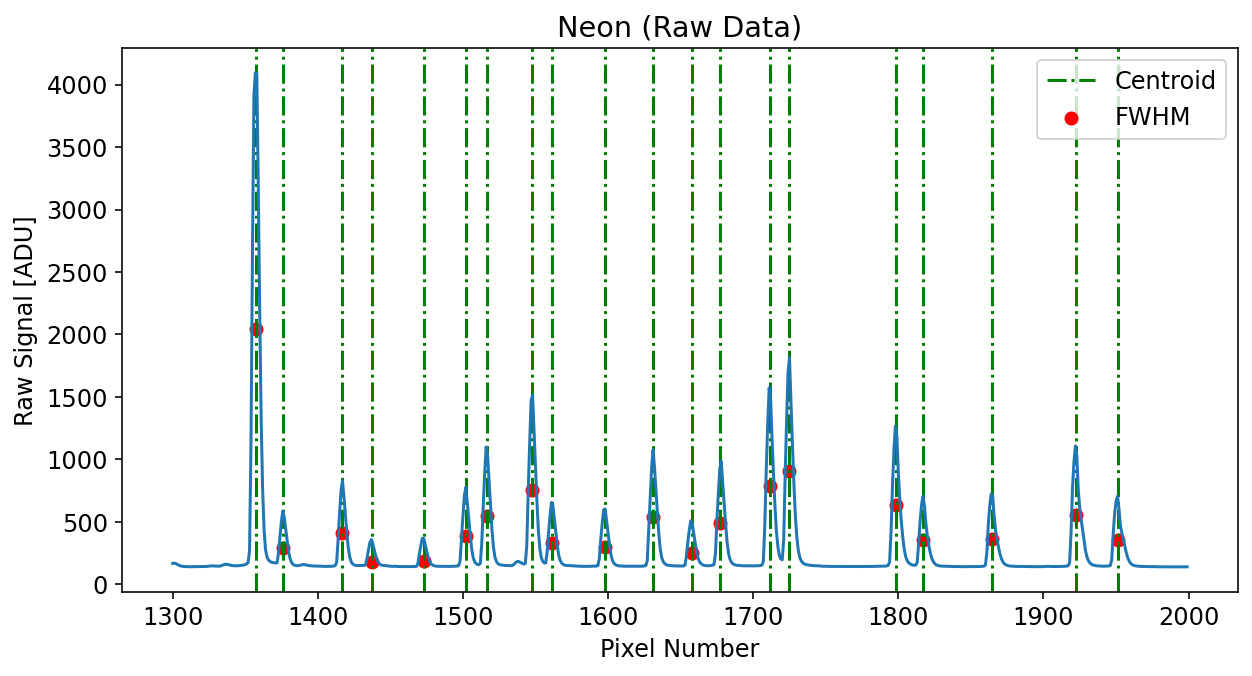

In [16]:
# Similar to with the peak finding code, 
# we want to confirm that the centroiding code worked, 
# so we will print out the FWHM signal values, their new CENTROID locations, 
# and then plot them over the original spectrum to see if everything lines up

# Let's print out indicators about our data
#--------------------------------------#
#This prints out two columns with the first representing the pixel location of the peak 
# and the second representing the signal value at that peak
print(np.hstack((np.vstack(centroids_neon),np.vstack(FWHM))))
#Output will be in the format below:
#Centroid x-coordinate/pixel, FWHM signal value 
#--------------------------------------#


# Let's plot the spectrum as well as vertical bars on our centroid x-coordinates/pixels 
# to make sure it looks correct
#-------------------------------------------------------------------------#


# This will plot the vertical lines on the centroid x-coordinates
#--------------------------------------#
def plot_vert(x): 
    '''
    Just plots vertical lines, in green dashes, at x-value X
    '''
    plt.axvline(x, color='green', ls='-.')
    # ls specifies the format intuitively
    
for i in centroids_neon[1:]: # Call our plotting function on every centroid except the first
    plot_vert(i)
#--------------------------------------#


# Let's plot the spectrum as well as the vertical centroid locations to make sure it looks like the correct
#--------------------------------------#
# Here, I am setting the minimum and maximum pixels that I want to view in the plot, 
# since the neon peaks will be easier to see in this pixel range
min_pixel = 1300
max_pixel = 2000

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 12})
plt.axvline(centroids_neon[0], color='green', ls='-.', label='Centroid') 
# Reserve the first so I don't have a million "centroid" labels
plt.plot(pixel[min_pixel:max_pixel], signal_avg_neon[min_pixel:max_pixel]) # Plot the actual spectrum
plt.scatter(centroids_neon, FWHM, color='red', marker='o', label='FWHM')
plt.title('Neon (Raw Data)')
plt.xlabel('Pixel Number')
plt.ylabel('Raw Signal [ADU]')
plt.legend()
plt.show()
#--------------------------------------#
#-------------------------------------------------------------------------#